<a href="https://colab.research.google.com/github/Theflawlessone/Data-Science/blob/main/Problem_set_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Load MNIST Montage

In [104]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [105]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [106]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()


In [107]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))


In [108]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [109]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [110]:
X.shape

(60000, 1, 28, 28)

In [111]:
x = X[3,0,:,:]

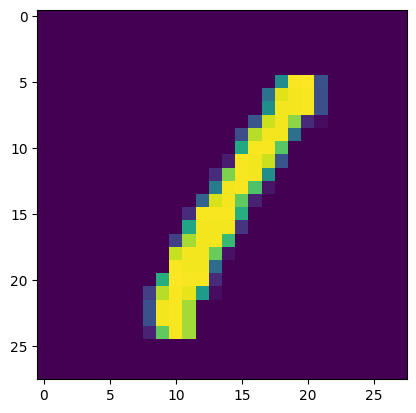

In [112]:
plt.imshow(x)

In [113]:
x = x.reshape(x.shape[0]*x.shape[1],1)

In [114]:
x.shape

(784, 1)

In [115]:
x = x.reshape(28,28)

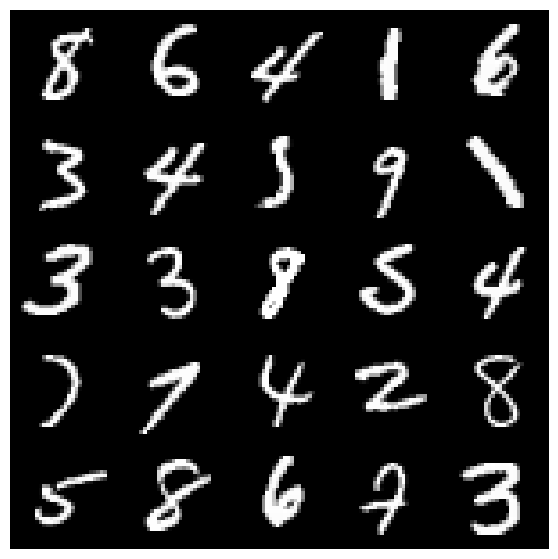

In [116]:
montage_plot(X[125:150,0,:,:])

In [117]:
# Run random y=mx

In [118]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [119]:
def plot(x,title=None):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)
    plt.show()

In [120]:
##MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [121]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [122]:
X.shape

(60000, 1, 28, 28)

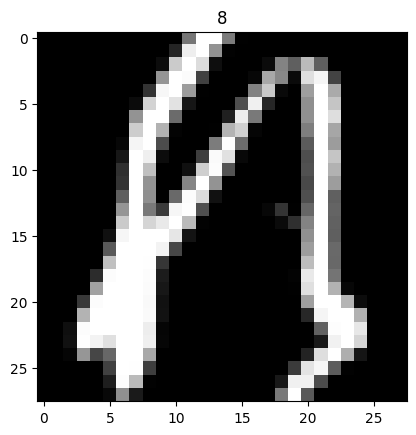

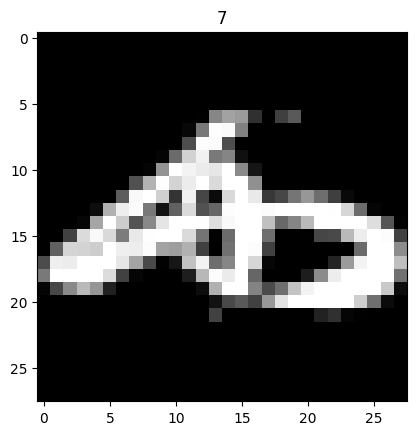

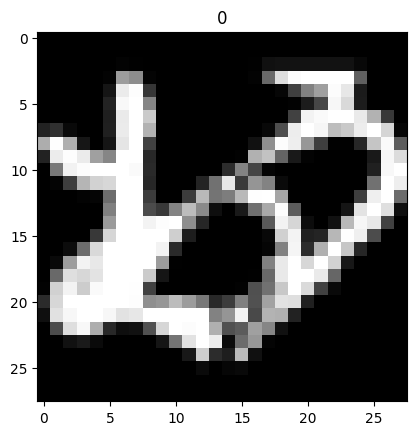

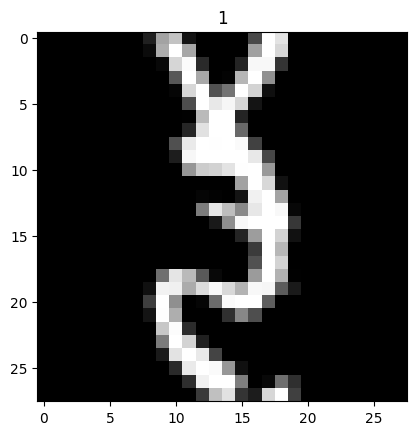

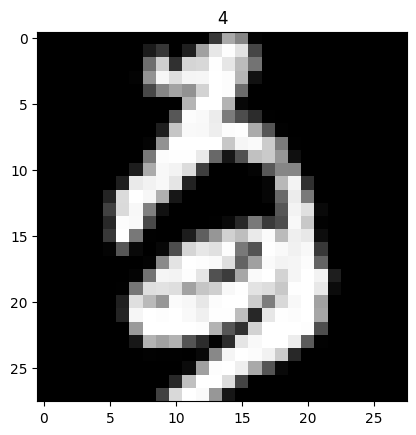

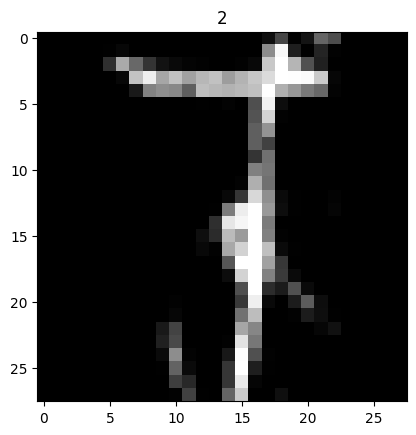

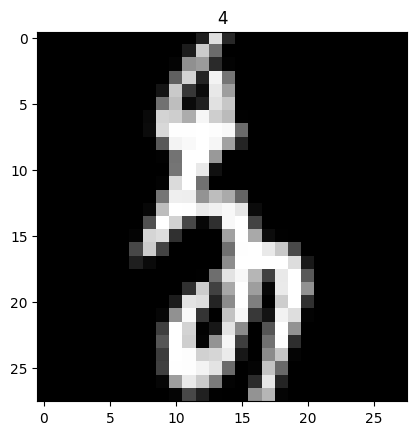

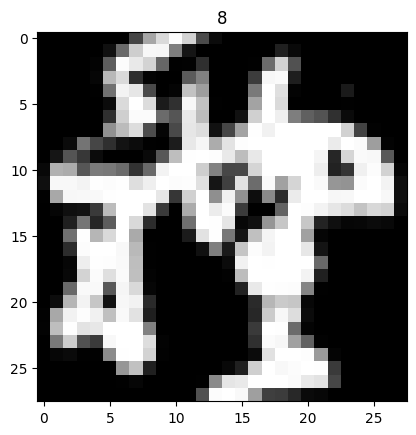

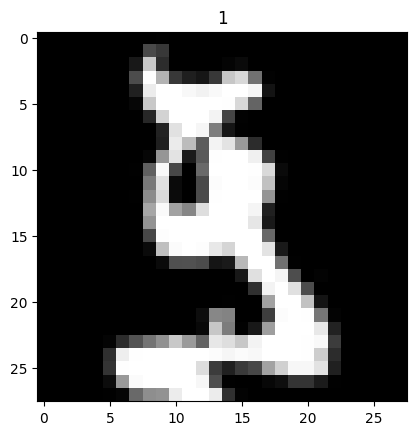

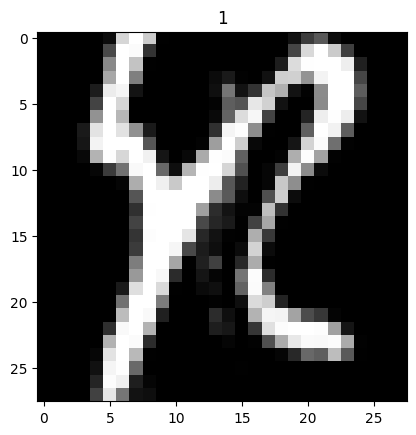

In [123]:

for i in range(10):
    plt.imshow(X[i,0,:,:],cmap='gray')
    plt.title(str(Y[i]))
    plt.show()

In [124]:
X[0,0,:,:].shape

(28, 28)

In [125]:
x = X[0,0,:,:].flatten()

In [126]:
x.shape

(784,)

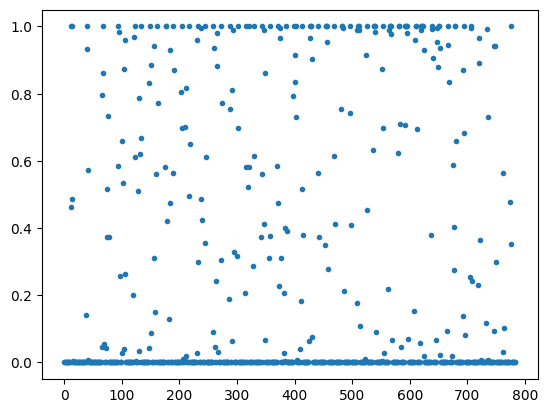

In [127]:
plt.plot(x,'.')

In [128]:
x.shape

(784,)

In [129]:
x = x[:,None]

In [130]:
m = np.random.standard_normal((10,784))

In [131]:
m.shape,x.shape

((10, 784), (784, 1))

In [132]:
y = m@x # @ mean matmul

In [133]:
y = np.matmul(m,x)

In [134]:
y.shape

(10, 1)

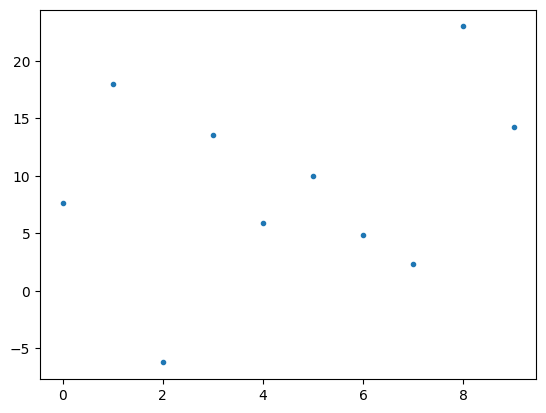

In [135]:
plt.plot(y,'.')

In [136]:
X.shape[0]

60000

In [137]:
X.shape[2]*X.shape[3]

784

In [138]:
X = np.reshape(X, (X.shape[0],X.shape[2]*X.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[2]*X_test.shape[3]))

In [139]:
X.shape

(60000, 784)

In [140]:
x = X[0:2,:]

In [141]:
x.shape

(2, 784)

In [142]:
x = x.T

In [143]:
m.shape,x.shape

((10, 784), (784, 2))

In [144]:
y = m@x

In [145]:
y

array([[  7.65279258,   8.62714847],
       [ 17.94787493,  16.93027949],
       [ -6.22087453,   2.3530188 ],
       [ 13.59003557, -12.30166378],
       [  5.94051646, -12.22716631],
       [ 10.02517898, -13.96414767],
       [  4.86690352,  19.79176816],
       [  2.31906367, -17.69047134],
       [ 22.98208946,  -1.32879165],
       [ 14.28743762,   0.50960566]])

In [146]:
np.max(y, axis=0)

array([22.98208946, 19.79176816])

In [147]:
y = np.argmax(y, axis=0)

In [148]:
Y[0:2]

array([8, 7])

In [149]:
y_ans = Y[0:2]

In [150]:
y_ans

array([8, 7])

In [151]:
y

array([8, 6])

In [152]:
np.sum((y == y_ans))/len(y)

0.5

In [153]:
X = X.T

In [154]:
X_test = X_test.T

In [155]:
m.shape,X.shape

((10, 784), (784, 60000))

In [156]:
y = m@X

In [157]:
y = np.argmax(y, axis=0)

In [158]:
y_ans = Y

In [159]:
acc = np.sum(y == y_ans)/len(Y)

In [160]:
acc

0.11575

In [161]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == y_ans)/len(Y)

print(acc)

0.10095


In [162]:
m_best = 0
acc_best = 0

for i in range(1000):

    m = 0.1*np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == y_ans)/len(Y)


    if acc > acc_best:
        print(acc)
        m_best = m
        acc_best = acc

0.12101666666666666
0.14621666666666666
0.15638333333333335
0.1709


In [163]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [164]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

RuntimeError: ignored

In [ ]:
# def scale(img):
#     img_min = torch.min(img)
#     img_max = torch.max(img)
#     scaled = (img - img_min) / (img_max - img_min) * 1.0
#     return scaled

In [ ]:
# X = scale(X)
# X_test = scale(X_test)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

In [ ]:
m_random = GPU_data(np.random.randn(10,784))

In [ ]:
m_random.shape

In [ ]:
plot(m_random[0,:].reshape(28,28))

In [ ]:
## Accuracy at least 75%

In [ ]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape
(M@X).shape
(torch.argmax((M@X), axis=1) == Y).shape
Y.shape
y = torch.argmax((M@X), axis=1)
score = ((y == Y).sum(1)/len(Y))
s = torch.argsort(score,descending=True)
score[s]

In [ ]:
N = 100
M = GPU_data(np.random.rand(N,10,784))

m_best = 0
acc_best = 0

step = 0.00000000001

for i in range(1000000):

    y = torch.argmax((M@X), axis=1)
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[50:100] = 0
    M[0:50] = M[0]
    M[1:] += step*GPU_data(np.random.rand(N-1,10,784))


    acc = score[s][0].item()

    if acc > acc_best:

        m_best = M[0]
        acc_best = acc

        print(i,acc)

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

In [ ]:
y_test = torch.argmax((M@X_test), axis=1)
score = ((y_test == Y_test).sum(1)/len(Y_test))
s = torch.argsort(score,descending=True)
acc_test = score[s][0].item()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming you have X and Y defined somewhere

# Initialize the best accuracy and best model
m_best = nn.Linear(784, 10)  # Assuming a linear model
acc_best = 0.0

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(m_best.parameters(), lr=0.01)  # Adjust the learning rate as needed

for i in range(100000):
    # Generate random updates for the model
    m_random = nn.Linear(784, 10)
    with torch.no_grad():
        m_random.weight.data.normal_(0, 1e-10)

    # Update the model parameters
    for param in m_best.parameters():
        param.data.add_(m_random.weight.data * 1e-10)

    # Forward pass
    y = m_best(X)

    # Compute accuracy
    _, y_pred = torch.max(y, 1)
    correct = (y_pred == Y).sum().item()
    acc = correct / len(Y)

    # Compute the loss
    loss = criterion(y, Y)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if acc > acc_best:
        print(f"Epoch {i+1}, Accuracy: {acc}")
        acc_best = acc


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Assuming you have X and Y defined somewhere
# You also need to define GPU_data and set up GPU if available.

# Set up GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the best accuracy and best model
m_best = nn.Linear(784, 10).to(device)  # Assuming a linear model
acc_best = 0.0

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(m_best.parameters(), lr=0.01)  # Adjust the learning rate as needed

for i in range(100000):
    # Generate random updates for the model
    m_random = nn.Linear(784, 10).to(device)
    with torch.no_grad():
        m_random.weight.data.normal_(0, 1e-10)

    # Update the model parameters
    for param in m_best.parameters():
        param.data.add_(m_random.weight.data * 1e-10)

    # Move data to GPU if available
    X, Y = X.to(device), Y.to(device)

    # Forward pass
    y = m_best(X)

    # Compute accuracy
    _, y_pred = torch.max(y, 1)
    correct = (y_pred == Y).sum().item()
    acc = correct / len(Y)

    # Compute the loss
    loss = criterion(y, Y)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if acc > acc_best:
        print(f"Epoch {i+1}, Accuracy: {acc}")
        acc_best = acc
